# Wildfire Analysis
## Overview
TODO

## Scientific Methodology
https://ec.europa.eu/jrc/en/publication/forest-fire-danger-extremes-europe-under-climate-change-variability-and-uncertainty

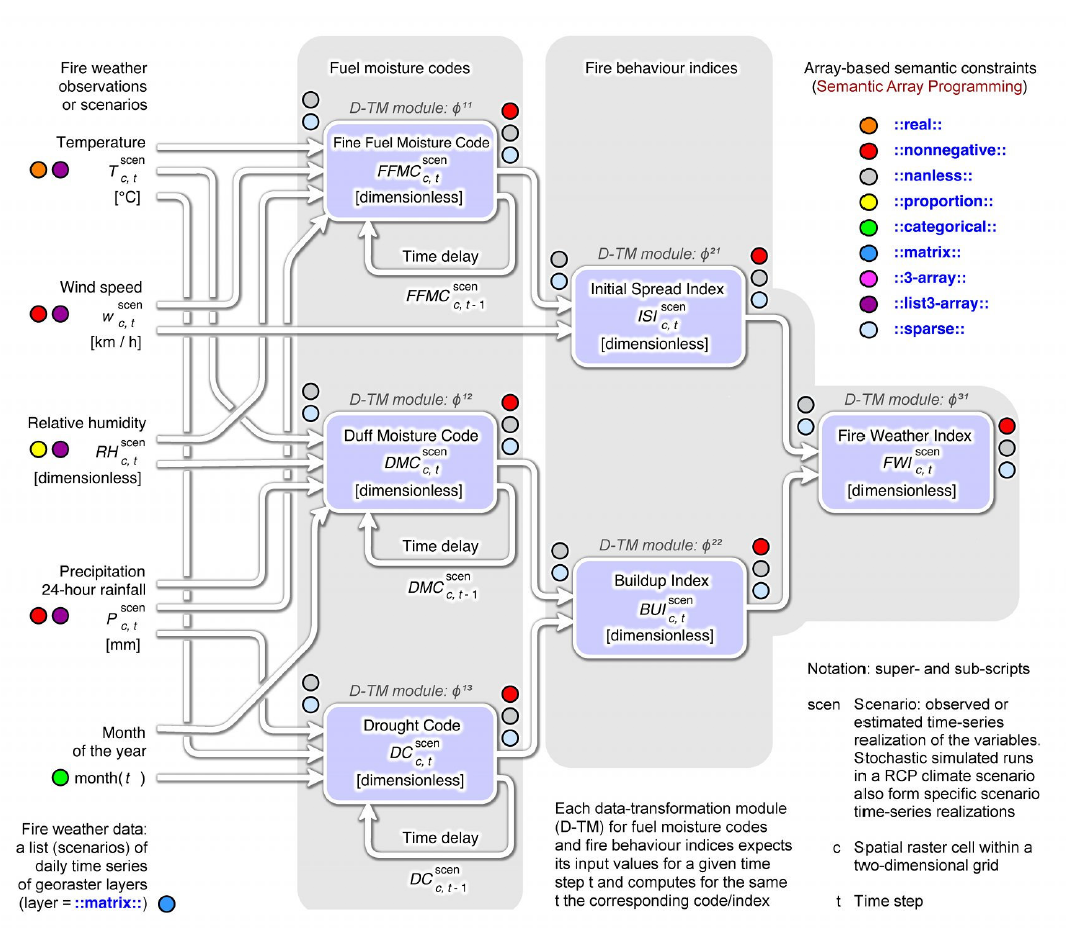

## Data Documentation
http://datastore.copernicus-climate.eu/documents/sis-european-tourism/C3S_D422_Lot2_TEC_FWI_dataset_description_v1.1.pdf


## Workflow
- Read in data
- Change analysis for # of days with moderate, high and very high FWI


In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import scipy.ndimage as ndimage
import matplotlib.ticker as mticker
from climate_analytics.utilities.precip_utilities import *
from climate_analytics.utilities.general_utilities import *

import plotly as py
import plotly.offline as py_off
from plotly.graph_objs import *
from scipy.io import netcdf
import geopandas

In [157]:
# Combine RCP45 frequency files into ensemble

model_list = ['CNRM-CERFACS-CNRM-CM5', 'ICHEC-EC-EARTH', 'IPSL-IPSL-CM5A-MR', 'MOHC-HadGEM2-ES','MPI-M-MPI-ESM-LR']
index_list = ['15','30','45']
input_dir = '/Users/Lori_Fomenko/Box Sync/Client_Dev/Italian_Banking/CORDEX_Historical_Individual_Models/'

for index in index_list:
    ensemble_list = []
    for model in model_list:
        file_name = f'eur11_rca4_{model}_historical_fwi-nods-gt-{index}_19810101_20051231_v1.nc'
        model_file = xr.open_dataset(input_dir+file_name)
        model_file = model_file.drop("time_bnds")
        model_file = model_file.assign(time=model_file.time.dt.year + 1)
        model_file = model_file.assign_coords({'model': f'{model}'}).expand_dims({'model': 1})
        ensemble_list.append(model_file)

    ensemble_ds = xr.concat(ensemble_list, 'model')

    if index == '15':
        severity = "mod"
    elif index == '30':
        severity = "high"
    elif index == '45':
        severity = "very_high"

    ensemble_ds.load().to_netcdf(f'/Users/Lori_Fomenko/Box Sync/Client_Dev/Italian_Banking/CORDEX_Historical_Individual_Models/hist_ensemble_{severity}_fwi_eu.nc')



In [158]:
# Man check mod, high, very high output files
hist_qc = xr.open_dataset('/Users/Lori_Fomenko/Box Sync/Client_Dev/Italian_Banking/CORDEX_Historical_Individual_Models/hist_ensemble_mod_fwi_eu.nc')
hist_qc


<xarray.Dataset>
Dimensions:         (model: 5, rlat: 412, rlon: 424, time: 25)
Coordinates:
    lat             (rlat, rlon) float64 ...
    lon             (rlat, rlon) float64 ...
  * time            (time) int64 1981 1982 1983 1984 ... 2002 2003 2004 2005
  * rlat            (rlat) float64 -23.38 -23.27 -23.16 ... 21.62 21.73 21.84
  * rlon            (rlon) float64 -28.38 -28.27 -28.16 ... 17.94 18.05 18.16
  * model           (model) object 'CNRM-CERFACS-CNRM-CM5' ... 'MPI-M-MPI-ESM-LR'
Data variables:
    rotated_pole    (model) |S1 ...
    fwi-nods-gt-15  (model, time, rlat, rlon) float64 ...
Attributes:
    creation_date:  2019-06-30-T11:12:49Z
    Frequency:      Annual
    institution:    National Observatory of Athens, URL: http://www.noa.gr
    contact:        cgiannak@noa.gr
    title:          fwi-nods-gt-15
    references:     van Wagner, C. E., (1987). Development and structure of a...
    Project:        C3S European Tourism
    history:        Version: 0.01
    Lineage:        
    Summary:        
    Keywords:       
    comment:        None
    License:        License to Use Copernicus Products

In [108]:
# Combine RCP45 frequency files into ensemble

model_list = ['CNRM-CERFACS-CNRM-CM5', 'ICHEC-EC-EARTH', 'IPSL-IPSL-CM5A-MR', 'MOHC-HadGEM2-ES','MPI-M-MPI-ESM-LR']
index_list = ['15','30','45']
time_list = ['20210101_20401231','20410101_20601231']
input_dir = '/Users/Lori_Fomenko/Box Sync/Client_Dev/Italian_Banking/CORDEX_RCP45_Individual_Models/'

for time in time_list:
    for index in index_list:
        ensemble_list = []
        for model in model_list:
            file_name = f'eur11_rca4_{model}_rcp45_fwi-nods-gt-{index}_{time}_v1.nc'
            model_file = xr.open_dataset(input_dir+file_name)
            model_file = model_file.assign(time=model_file.time.dt.year + 1)
            model_file = model_file.drop("time_bnds")   
            model_file = model_file.assign_coords({'model': f'{model}'}).expand_dims({'model': 1})
            ensemble_list.append(model_file)
            
        ensemble_ds = xr.concat(ensemble_list, 'model')
        
        if index == '15':
            severity = "mod"
        elif index == '30':
            severity = "high"
        elif index == '45':
            severity = "very_high"
            
        if time == '20210101_20401231':
            fut = '2030'
        elif time == '20410101_20601231':
            fut = '2050'
            
        ensemble_ds.load().to_netcdf(f'/Users/Lori_Fomenko/Box Sync/Client_Dev/Italian_Banking/CORDEX_RCP45_Individual_Models/rcp45_ensemble_{severity}_fwi_eu_{fut}.nc')


In [114]:
# Man Check mod, high, very high output files for 2030, 2050
rcp45_qc = xr.open_dataset('/Users/Lori_Fomenko/Box Sync/Client_Dev/Italian_Banking/CORDEX_RCP45_Individual_Models/rcp45_ensemble_very_high_fwi_eu_2050.nc')
rcp45_qc


<xarray.Dataset>
Dimensions:         (model: 5, rlat: 412, rlon: 424, time: 20)
Coordinates:
    lat             (rlat, rlon) float64 ...
    lon             (rlat, rlon) float64 ...
  * time            (time) int64 2041 2042 2043 2044 ... 2057 2058 2059 2060
  * rlat            (rlat) float64 -23.38 -23.27 -23.16 ... 21.62 21.73 21.84
  * rlon            (rlon) float64 -28.38 -28.27 -28.16 ... 17.94 18.05 18.16
  * model           (model) object 'CNRM-CERFACS-CNRM-CM5' ... 'MPI-M-MPI-ESM-LR'
Data variables:
    rotated_pole    (model) |S1 ...
    fwi-nods-gt-45  (model, time, rlat, rlon) float64 ...
Attributes:
    creation_date:  2019-06-30-T14:52:28Z
    Frequency:      Annual
    institution:    National Observatory of Athens, URL: http://www.noa.gr
    contact:        cgiannak@noa.gr
    title:          fwi-nods-gt-45
    references:     van Wagner, C. E., (1987). Development and structure of a...
    Project:        C3S European Tourism
    history:        Version: 0.01
    Lineage:        
    Summary:        
    Keywords:       
    comment:        None
    License:        License to Use Copernicus Products

In [121]:
# Combine RCP85 frequency files into ensemble

model_list = ['CNRM-CERFACS-CNRM-CM5', 'ICHEC-EC-EARTH', 'IPSL-IPSL-CM5A-MR', 'MOHC-HadGEM2-ES','MPI-M-MPI-ESM-LR']
index_list = ['15','30','45']
time_list = ['20210101_20401231','20410101_20601231']
input_dir = '/Users/Lori_Fomenko/Box Sync/Client_Dev/Italian_Banking/CORDEX_RCP85_Individual_Models/'

for time in time_list:
    for index in index_list:
        ensemble_list = []
        for model in model_list:
            file_name = f'eur11_rca4_{model}_rcp85_fwi-nods-gt-{index}_{time}_v1.nc'
            model_file = xr.open_dataset(input_dir+file_name)
            model_file = model_file.assign(time=model_file.time.dt.year + 1)
            model_file = model_file.drop("time_bnds")      
            model_file = model_file.assign_coords({'model': f'{model}'}).expand_dims({'model': 1})
            ensemble_list.append(model_file)
            
        ensemble_ds = xr.concat(ensemble_list, 'model')
        
        if index == '15':
            severity = "mod"
        elif index == '30':
            severity = "high"
        elif index == '45':
            severity = "very_high"
            
        if time == '20210101_20401231':
            fut = '2030'
        elif time == '20410101_20601231':
            fut = '2050'
            
        ensemble_ds.load().to_netcdf(f'/Users/Lori_Fomenko/Box Sync/Client_Dev/Italian_Banking/CORDEX_RCP85_Individual_Models/rcp85_ensemble_{severity}_fwi_eu_{fut}.nc')


In [127]:
# Man check mod, high, very high output files for 2030, 2050
rcp85_qc = xr.open_dataset('/Users/Lori_Fomenko/Box Sync/Client_Dev/Italian_Banking/CORDEX_RCP85_Individual_Models/rcp85_ensemble_mod_fwi_eu_2030.nc')
rcp85_qc


<xarray.Dataset>
Dimensions:         (model: 5, rlat: 412, rlon: 424, time: 20)
Coordinates:
    lat             (rlat, rlon) float64 ...
    lon             (rlat, rlon) float64 ...
  * time            (time) int64 2021 2022 2023 2024 ... 2037 2038 2039 2040
  * rlat            (rlat) float64 -23.38 -23.27 -23.16 ... 21.62 21.73 21.84
  * rlon            (rlon) float64 -28.38 -28.27 -28.16 ... 17.94 18.05 18.16
  * model           (model) object 'CNRM-CERFACS-CNRM-CM5' ... 'MPI-M-MPI-ESM-LR'
Data variables:
    rotated_pole    (model) |S1 ...
    fwi-nods-gt-15  (model, time, rlat, rlon) float64 ...
Attributes:
    creation_date:  2019-06-30-T11:14:35Z
    Frequency:      Annual
    institution:    National Observatory of Athens, URL: http://www.noa.gr
    contact:        cgiannak@noa.gr
    title:          fwi-nods-gt-15
    references:     van Wagner, C. E., (1987). Development and structure of a...
    Project:        C3S European Tourism
    history:        Version: 0.01
    Lineage:        
    Summary:        
    Keywords:       
    comment:        None
    License:        License to Use Copernicus Products

In [337]:
his_period = ['1986', '2005']
fut_period = ['2021', '2040']

hist_fire = xr.open_dataset('/Users/Lori_Fomenko/Box Sync/Client_Dev/Italian_Banking/CORDEX_Historical_Individual_Models/hist_ensemble_mod_fwi_eu.nc')
rcp45_fire = xr.open_dataset('/Users/Lori_Fomenko/Box Sync/Client_Dev/Italian_Banking/CORDEX_RCP45_Individual_Models/rcp45_ensemble_mod_fwi_eu_2030.nc')
rcp85_fire = xr.open_dataset('/Users/Lori_Fomenko/Box Sync/Client_Dev/Italian_Banking/CORDEX_RCP85_Individual_Models/rcp85_ensemble_mod_fwi_eu_2030.nc')

#pr_85 = pr_85_f.sel(model=['BNU-ESM', 'CESM1-BGC', 'CNRM-CM5', 'CanESM2','GFDL-ESM2G', 'MPI-ESM-MR', 'NorESM1-M', 'bcc-csm1-1', 'inmcm4'])
#pr_45 = pr_45_f.sel(model=['BNU-ESM', 'CESM1-BGC', 'CNRM-CM5', 'CanESM2','GFDL-ESM2G', 'MPI-ESM-MR', 'NorESM1-M', 'bcc-csm1-1', 'inmcm4'])



In [338]:
hist_fire = hist_fire.sel(time=slice(his_period[0],his_period[1])).drop("rotated_pole")
hist_fire

<xarray.Dataset>
Dimensions:         (model: 5, rlat: 412, rlon: 424, time: 20)
Coordinates:
    lat             (rlat, rlon) float64 ...
    lon             (rlat, rlon) float64 ...
  * time            (time) int64 1986 1987 1988 1989 ... 2002 2003 2004 2005
  * rlat            (rlat) float64 -23.38 -23.27 -23.16 ... 21.62 21.73 21.84
  * rlon            (rlon) float64 -28.38 -28.27 -28.16 ... 17.94 18.05 18.16
  * model           (model) object 'CNRM-CERFACS-CNRM-CM5' ... 'MPI-M-MPI-ESM-LR'
Data variables:
    fwi-nods-gt-15  (model, time, rlat, rlon) float64 ...
Attributes:
    creation_date:  2019-06-30-T11:12:49Z
    Frequency:      Annual
    institution:    National Observatory of Athens, URL: http://www.noa.gr
    contact:        cgiannak@noa.gr
    title:          fwi-nods-gt-15
    references:     van Wagner, C. E., (1987). Development and structure of a...
    Project:        C3S European Tourism
    history:        Version: 0.01
    Lineage:        
    Summary:        
    Keywords:       
    comment:        None
    License:        License to Use Copernicus Products

In [339]:
rcp45_fire = rcp45_fire.sel(time=slice(fut_period[0],fut_period[1])).drop("rotated_pole") 
rcp45_fire

<xarray.Dataset>
Dimensions:         (model: 5, rlat: 412, rlon: 424, time: 20)
Coordinates:
    lat             (rlat, rlon) float64 ...
    lon             (rlat, rlon) float64 ...
  * time            (time) int64 2021 2022 2023 2024 ... 2037 2038 2039 2040
  * rlat            (rlat) float64 -23.38 -23.27 -23.16 ... 21.62 21.73 21.84
  * rlon            (rlon) float64 -28.38 -28.27 -28.16 ... 17.94 18.05 18.16
  * model           (model) object 'CNRM-CERFACS-CNRM-CM5' ... 'MPI-M-MPI-ESM-LR'
Data variables:
    fwi-nods-gt-15  (model, time, rlat, rlon) float64 ...
Attributes:
    creation_date:  2019-06-30-T11:06:54Z
    Frequency:      Annual
    institution:    National Observatory of Athens, URL: http://www.noa.gr
    contact:        cgiannak@noa.gr
    title:          fwi-nods-gt-15
    references:     van Wagner, C. E., (1987). Development and structure of a...
    Project:        C3S European Tourism
    history:        Version: 0.01
    Lineage:        
    Summary:        
    Keywords:       
    comment:        None
    License:        License to Use Copernicus Products

In [340]:
rcp85_fire = rcp85_fire.sel(time=slice(fut_period[0],fut_period[1])).drop("rotated_pole")
rcp85_fire

<xarray.Dataset>
Dimensions:         (model: 5, rlat: 412, rlon: 424, time: 20)
Coordinates:
    lat             (rlat, rlon) float64 ...
    lon             (rlat, rlon) float64 ...
  * time            (time) int64 2021 2022 2023 2024 ... 2037 2038 2039 2040
  * rlat            (rlat) float64 -23.38 -23.27 -23.16 ... 21.62 21.73 21.84
  * rlon            (rlon) float64 -28.38 -28.27 -28.16 ... 17.94 18.05 18.16
  * model           (model) object 'CNRM-CERFACS-CNRM-CM5' ... 'MPI-M-MPI-ESM-LR'
Data variables:
    fwi-nods-gt-15  (model, time, rlat, rlon) float64 ...
Attributes:
    creation_date:  2019-06-30-T11:14:35Z
    Frequency:      Annual
    institution:    National Observatory of Athens, URL: http://www.noa.gr
    contact:        cgiannak@noa.gr
    title:          fwi-nods-gt-15
    references:     van Wagner, C. E., (1987). Development and structure of a...
    Project:        C3S European Tourism
    history:        Version: 0.01
    Lineage:        
    Summary:        
    Keywords:       
    comment:        None
    License:        License to Use Copernicus Products

CNRM-CERFACS-CNRM-CM5, 0
ICHEC-EC-EARTH, 1


/Users/Lori_Fomenko/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning:

Mean of empty slice

/Users/Lori_Fomenko/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning:

Mean of empty slice



IPSL-IPSL-CM5A-MR, 2
MOHC-HadGEM2-ES, 3


/Users/Lori_Fomenko/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning:

Mean of empty slice

/Users/Lori_Fomenko/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning:

Mean of empty slice



MPI-M-MPI-ESM-LR, 4


/Users/Lori_Fomenko/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning:

Mean of empty slice

/Users/Lori_Fomenko/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning:

Mean of empty slice



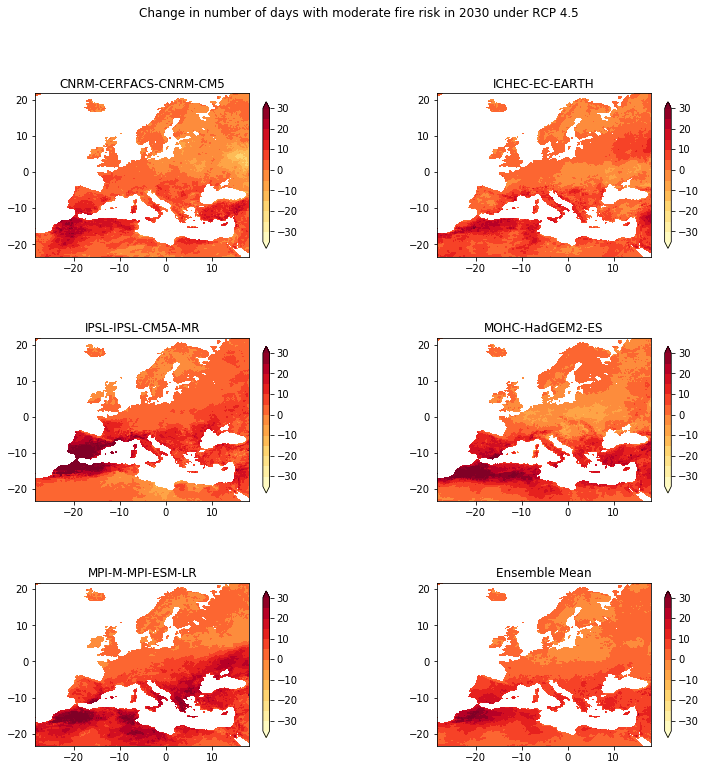

In [354]:
fig, axs = plt.subplots(3, 2, figsize=(12, 12), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.5)

axs = axs.flatten()

i = 0

for model in hist_fire.model.values:
    print(f'{model}, {i}')
    mod_hist_fire = hist_fire.sel(model=slice(f'{model}',f'{model}'))
    #test_hist = mod_hist_fire.mean(['time', 'model'])
    mod_rcp45_fire = rcp45_fire.sel(model=slice(f'{model}',f'{model}'))
    #test_rcp45 = mod_rcp45_fire.mean(['time', 'model'])
    change45_mod = mod_rcp45_fire.mean(['time', 'model']) - mod_hist_fire.mean(['time', 'model'])
    axs[i].contourf(change45_mod.rlon,change45_mod.rlat,change45_mod['fwi-nods-gt-15'],cmap='Reds')
    axs[i].set_title(f'{model}')
    cs = axs[i].contourf(change45_mod.rlon,change45_mod.rlat,change45_mod['fwi-nods-gt-15'],
                     levels=np.arange(-35.0,35.0,5), cmap='YlOrRd', extend='both')
    fig.colorbar(cs, ax=axs[i], shrink=0.9)
    i = i + 1
    
change45_mod = rcp45_fire.mean(['time', 'model']) - hist_fire.mean(['time', 'model'])
axs[5].contourf(change45_mod.rlon,change45_mod.rlat,change45_mod['fwi-nods-gt-15'],cmap='Reds')
axs[5].set_title('Ensemble Mean')
cs = axs[5].contourf(change45_mod.rlon,change45_mod.rlat,change45_mod['fwi-nods-gt-15'],
                     levels=np.arange(-35.0,35.0,5), cmap='YlOrRd', extend='both')
fig.colorbar(cs, ax=axs[5], shrink=0.9)
fig.suptitle('Change in number of days with moderate fire risk in 2030 under RCP 4.5')

plt.savefig(f'hist_rcp45_ensemble_spread_change_mod_fwi_2030.png',bbox_inches = 'tight', dpi=300)

/Users/Lori_Fomenko/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning:

Mean of empty slice



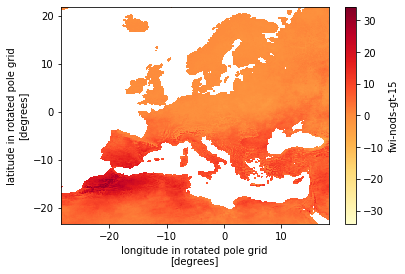

In [355]:
change45 = rcp45_fire.mean(['time', 'model']) - hist_fire.mean(['time', 'model'])
change45['fwi-nods-gt-15'].plot(cmap='YlOrRd')

In [356]:
change45.load().to_netcdf(f'/Users/Lori_Fomenko/Box Sync/Client_Dev/Italian_Banking/Ensemble_Change_Outputs/Moderate_FWI_Mean_Ensemble_Change_RCP45_2030.nc')


CNRM-CERFACS-CNRM-CM5, 0
ICHEC-EC-EARTH, 1


/Users/Lori_Fomenko/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning:

Mean of empty slice

/Users/Lori_Fomenko/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning:

Mean of empty slice



IPSL-IPSL-CM5A-MR, 2
MOHC-HadGEM2-ES, 3


/Users/Lori_Fomenko/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning:

Mean of empty slice

/Users/Lori_Fomenko/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning:

Mean of empty slice



MPI-M-MPI-ESM-LR, 4


/Users/Lori_Fomenko/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning:

Mean of empty slice

/Users/Lori_Fomenko/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning:

Mean of empty slice



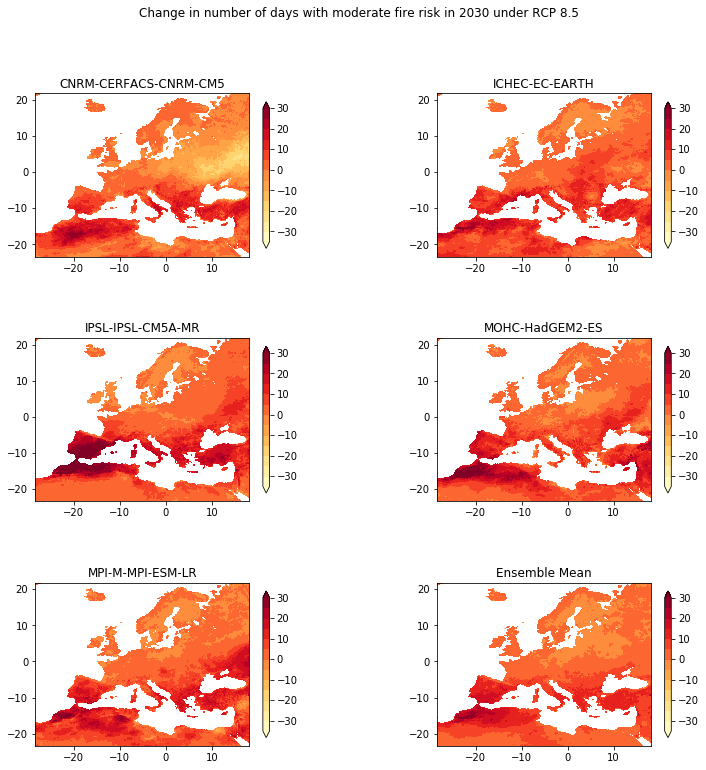

In [325]:
fig, axs = plt.subplots(3, 2, figsize=(12, 12), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.5)

axs = axs.flatten()

i = 0

for model in hist_fire.model.values:
    print(f'{model}, {i}')
    mod_hist_fire = hist_fire.sel(model=slice(f'{model}',f'{model}'))
    #test_hist = mod_hist_fire.mean(['time', 'model'])
    mod_rcp85_fire = rcp85_fire.sel(model=slice(f'{model}',f'{model}'))
    #test_rcp85 = mod_rcp85_fire.mean(['time', 'model'])
    change85_mod = mod_rcp85_fire.mean(['time', 'model']) - mod_hist_fire.mean(['time', 'model'])
    axs[i].contourf(change85_mod.rlon,change85_mod.rlat,change85_mod['fwi-nods-gt-15'],cmap='Reds')
    axs[i].set_title(f'{model}')
    cs = axs[i].contourf(change85_mod.rlon,change85_mod.rlat,change85_mod['fwi-nods-gt-15'],
                     levels=np.arange(-35.0,35.0,5), cmap='YlOrRd', extend='both')
    fig.colorbar(cs, ax=axs[i], shrink=0.9)
    i = i + 1
    
change85_mod = rcp85_fire.mean(['time', 'model']) - hist_fire.mean(['time', 'model'])
axs[5].contourf(change85_mod.rlon,change85_mod.rlat,change85_mod['fwi-nods-gt-15'],cmap='Reds')
axs[5].set_title('Ensemble Mean')
cs = axs[5].contourf(change85_mod.rlon,change85_mod.rlat,change85_mod['fwi-nods-gt-15'],
                     levels=np.arange(-35.0,35.0,5), cmap='YlOrRd', extend='both')
fig.colorbar(cs, ax=axs[5], shrink=0.9)
fig.suptitle('Change in number of days with moderate fire risk in 2030 under RCP 8.5')

plt.savefig(f'hist_rcp85_ensemble_spread_change_mod_fwi_2030.png',bbox_inches = 'tight', dpi=300)

/Users/Lori_Fomenko/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning:

Mean of empty slice



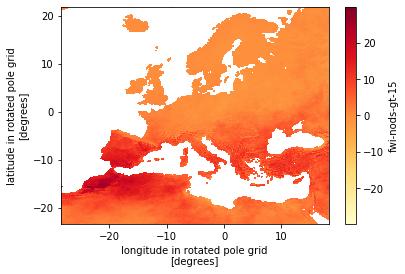

In [326]:
change85 = rcp85_fire.mean(['time', 'model']) - hist_fire.mean(['time', 'model'])
change85['fwi-nods-gt-15'].plot(cmap='YlOrRd')

In [352]:
change85.load().to_netcdf(f'/Users/Lori_Fomenko/Box Sync/Client_Dev/Italian_Banking/Ensemble_Change_Outputs/Moderate_FWI_Mean_Ensemble_Change_RCP85_2030.nc')
